In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)


[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [15]:
#PREPROCESSING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
#reducing dimensions
X_train=[]
Y_train=[]
for i in range (60,1258):
  X_train.append(scaled_training_set[i-60:i,0] )
  Y_train.append(scaled_training_set[i,0] )
X_train=np.array(X_train)
Y_train=np.array(Y_train)



In [19]:
print(X_train.shape)
print(Y_train.shape)

(1198, 60)
(1198,)


In [20]:
#reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [21]:
# since the data is continous we apply three different regression models
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

<ipython-input-21-75f80590b767>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [23]:
path = '/content/Google_Stock_Price_Train.csv'
df = pd.read_csv('/content/Google_Stock_Price_Train.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (1258, 6)



In [28]:
#Lets look into top few rows and columns in the dataset
df.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [29]:
#Exploratory data analysis
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


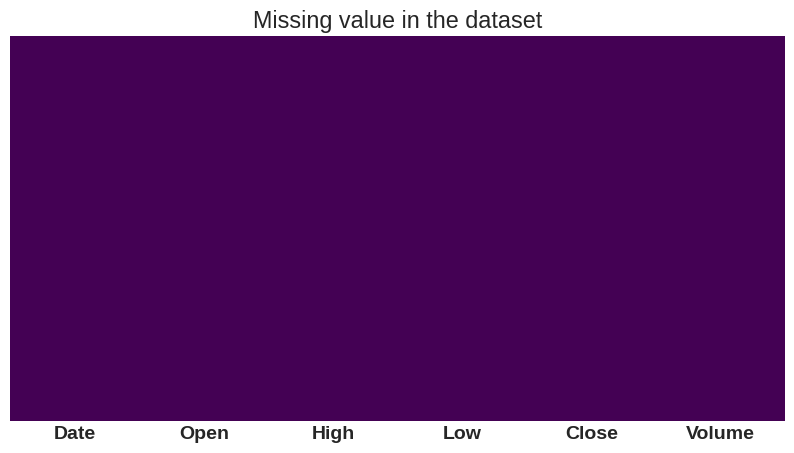

In [32]:
#CheckING for missing value
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing value in the data seT

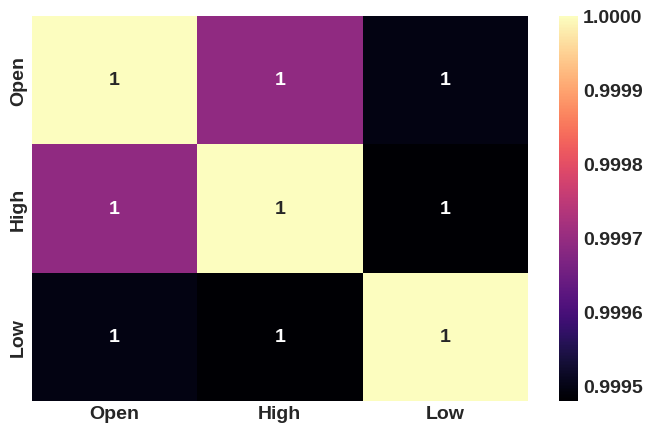

In [34]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'magma', annot= True);


In [35]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [38]:
regressor = Sequential()
regressor.add(LSTM(units = 50 , return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [41]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,  Y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 151ms/step - loss: 0.0375
Epoch 2/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0044
Epoch 13/100

In [43]:
#EXTRACTING ACTUAL VALUES
dataset_test = pd.read_csv('/content/Google_Stock_Price_Train.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

In [49]:
#finalizing the model
dataset_total= pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range (60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [50]:
#working of model, anlyzing portfolio performance by predicting value
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


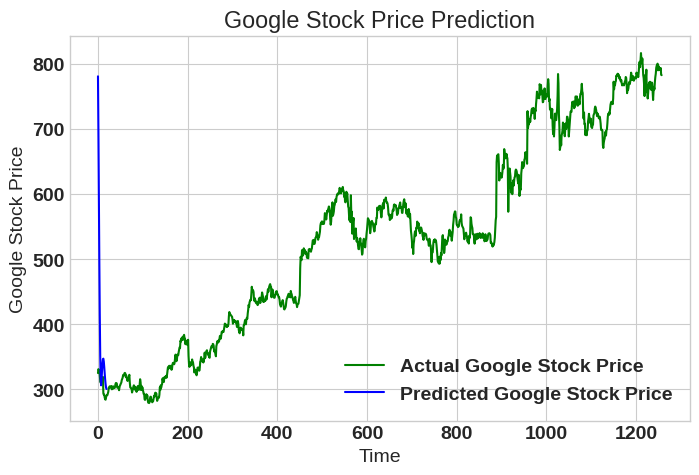

In [53]:
#checking accuracy by plotting actual vs predicted graph
plt.plot(actual_stock_price,color='green',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color ='blue',label= 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()